# Decision Trees Exercises

![DecisionTree.png](Assets/DecisionTree.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Learning Objectives

- Recognize Decision trees and how to use them for classification problems
- Recognize how to identify the best split and the factors for splitting
- Explain strengths and weaknesses of decision trees
- Explain how regression trees help with classifying continuous values
- Describe motivation for choosing Random Forest Classifier over Decision Trees
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware for Random Forest Classifier

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code PRIOR to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [ ]:
from __future__ import print_function
import os
data_path = ['../data']

# This listener will import Intel Extnsions for Scikit-learn optimized versions
# for any applicable imports from scikit-learn once this patch has been run

from sklearnex import patch_sklearn
patch_sklearn()

from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

## Question 1

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [5]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/MLL/Wine_Quality_Data.csv")

print("First few rows of the dataset:")
print(data.head())

print("\nFeatures in the dataset:")
print(data.columns)


print("\nUnique values in the 'color' column:")
print(data['color'].unique())


First few rows of the dataset:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  

In [6]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data['color'] = label_encoder.fit_transform(data['color'])

print("\nUnique encoded values in the 'color' column:")
print(data['color'].unique())



Unique encoded values in the 'color' column:
[0 1]


## Question 2

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

X = data.drop('color', axis=1)
y = data['color']


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


print("Train set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest set:")
print(y_test.value_counts(normalize=True) * 100)


Train set:
color
1    75.389648
0    24.610352
Name: proportion, dtype: float64

Test set:
color
1    75.384615
0    24.615385
Name: proportion, dtype: float64


## Question 3

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


tree_classifier = DecisionTreeClassifier()


tree_classifier.fit(X_train, y_train)


num_nodes = tree_classifier.tree_.node_count
depth = tree_classifier.tree_.max_depth
print("Number of nodes:", num_nodes)
print("Depth of the tree:", depth)


train_predictions = tree_classifier.predict(X_train)
test_predictions = tree_classifier.predict(X_test)


train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

print("\nPrediction error on train data:", train_error)
print("Prediction error on test data:", test_error)


Number of nodes: 151
Depth of the tree: 20

Prediction error on train data: 0.0
Prediction error on test data: 0.007692307692307665


## Question 4

* Replace Decision Tree in the cell above with Random Forest algorithm
* from sklearn.ensemble import RandomForestClassifier
* patch sklearn to apply fast version from Intel Extensions for Sckit-learn*
* Instantiate RandomForestClassifier(random_state=42)
* Examine feature importance: dict(zip(X_train.columns, dt.feature_importances_))
* Compare Metrics of Decision Tree to Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import sklearn
sklearn.set_config(assume_finite=True)


forest_classifier = RandomForestClassifier(random_state=42)


forest_classifier.fit(X_train, y_train)


feature_importances = dict(zip(X_train.columns, forest_classifier.feature_importances_))
print("Feature Importances:")
print(feature_importances)


train_predictions_rf = forest_classifier.predict(X_train)
test_predictions_rf = forest_classifier.predict(X_test)

train_error_rf = 1 - accuracy_score(y_train, train_predictions_rf)
test_error_rf = 1 - accuracy_score(y_test, test_predictions_rf)

print("\nRandom Forest Metrics:")
print("Prediction error on train data:", train_error_rf)
print("Prediction error on test data:", test_error_rf)




Feature Importances:
{'fixed_acidity': 0.038769752773148904, 'volatile_acidity': 0.14897272858039215, 'citric_acid': 0.01701144195412363, 'residual_sugar': 0.050355210756927934, 'chlorides': 0.2700738935800585, 'free_sulfur_dioxide': 0.061826839721621375, 'total_sulfur_dioxide': 0.27078931870910466, 'density': 0.05354587602650362, 'pH': 0.017022968092849124, 'sulphates': 0.05868230206730539, 'alcohol': 0.010018491463309277, 'quality': 0.0029311762746554826}

Random Forest Metrics:
Prediction error on train data: 0.0
Prediction error on test data: 0.0038461538461538325


## Question 5

* Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.

In [10]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_classifier_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_classifier_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_tree_model = grid_search.best_estimator_

num_nodes_best = best_tree_model.tree_.node_count
depth_best = best_tree_model.tree_.max_depth
print("Number of nodes in the best tree:", num_nodes_best)
print("Depth of the best tree:", depth_best)
train_predictions_best = best_tree_model.predict(X_train)
test_predictions_best = best_tree_model.predict(X_test)
train_error_best = 1 - accuracy_score(y_train, train_predictions_best)
test_error_best = 1 - accuracy_score(y_test, test_predictions_best)

print("\nBest Decision Tree Metrics:")
print("Prediction error on train data:", train_error_best)
print("Prediction error on test data:", test_error_best)


Number of nodes in the best tree: 151
Depth of the best tree: 20

Best Decision Tree Metrics:
Prediction error on train data: 0.0
Prediction error on test data: 0.00846153846153841


## Question 6

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.


Best Decision Tree Regression Metrics:
Mean Squared Error on train data: 0.31836123928469123
Mean Squared Error on test data: 2.600357367605267


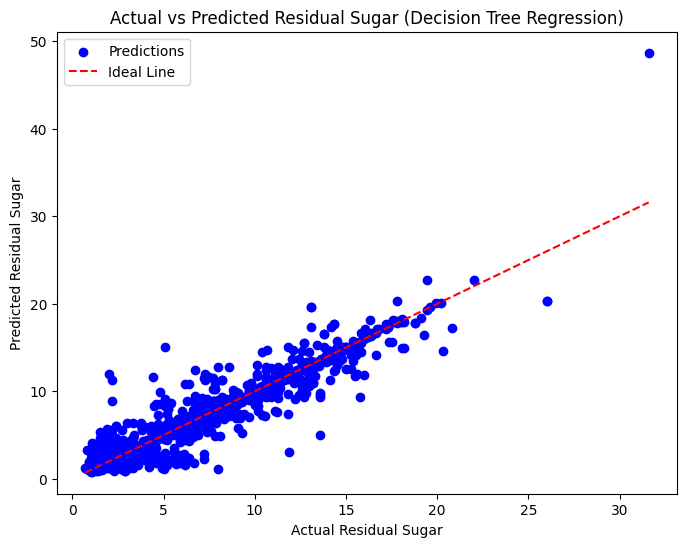

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X_residual_sugar = data.drop('residual_sugar', axis=1)
y_residual_sugar = data['residual_sugar']
X_train_sugar, X_test_sugar = X_residual_sugar.iloc[train_index], X_residual_sugar.iloc[test_index]
y_train_sugar, y_test_sugar = y_residual_sugar.iloc[train_index], y_residual_sugar.iloc[test_index]
param_grid_regression = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_regressor = DecisionTreeRegressor(random_state=42)
grid_search_regression = GridSearchCV(tree_regressor, param_grid_regression, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_regression.fit(X_train_sugar, y_train_sugar)
best_tree_model_regression = grid_search_regression.best_estimator_
train_predictions_regression = best_tree_model_regression.predict(X_train_sugar)
test_predictions_regression = best_tree_model_regression.predict(X_test_sugar)
train_mse_regression = mean_squared_error(y_train_sugar, train_predictions_regression)
test_mse_regression = mean_squared_error(y_test_sugar, test_predictions_regression)

print("\nBest Decision Tree Regression Metrics:")
print("Mean Squared Error on train data:", train_mse_regression)
print("Mean Squared Error on test data:", test_mse_regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sugar, test_predictions_regression, color='blue', label='Predictions')
plt.plot([min(y_test_sugar), max(y_test_sugar)], [min(y_test_sugar), max(y_test_sugar)], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Residual Sugar (Decision Tree Regression)')
plt.xlabel('Actual Residual Sugar')
plt.ylabel('Predicted Residual Sugar')
plt.legend()
plt.show()


## Question 7 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.